<a href="https://colab.research.google.com/github/parmarsuraj99/10DaysofMLChallenge/blob/master/day8/Day_8_10DaysofMLChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task: Clustering or grouping the documents based on the patterns and similarities.**

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle


kaggle.json


In [0]:
!kaggle datasets download -d dushyantv/consumer_complaints

 97% 138M/142M [00:01<00:00, 121MB/s]
100% 142M/142M [00:01<00:00, 118MB/s]


In [0]:
!unzip consumer_complaints.zip

Archive:  consumer_complaints.zip
  inflating: Consumer_Complaints.csv  


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [0]:
data = pd.read_csv('Consumer_Complaints.csv')
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID,Unnamed: 18
0,03-12-2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217,NaN
1,10-01-2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10-05-2016,Closed with explanation,Yes,No,2141773,NaN
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100,NaN
3,06-08-2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06-10-2014,Closed with explanation,Yes,Yes,885638,NaN
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760,NaN


In [0]:
data.isna().sum()

Date received                         0
Product                               0
Sub-product                      235170
Issue                                 0
Sub-issue                        496157
Consumer Complaint               747196
Company Public Response          706646
Company                               0
State                             12360
ZIP code                          16718
Tags                             883422
Consumer consent provided?       533099
Submitted via                         0
Date Sent to Company                  0
Company Response to Consumer          3
Timely response?                      0
Consumer disputed?               256456
Complaint ID                          0
Unnamed: 18                     1025010
dtype: int64

In [0]:
idx = data["Consumer Complaint"].isna()==False

In [0]:
data.loc[idx, "Consumer Complaint"].values

array(['I have outdated information on my credit report that I have previously disputed that has yet to be removed this information is more then seven years old and does not meet credit reporting requirements',
       "I purchased a new car on XXXX XXXX. The car dealer called Citizens Bank to get a 10 day payoff on my loan, good till XXXX XXXX. The dealer sent the check the next day. When I balanced my checkbook on XXXX XXXX. I noticed that Citizens bank had taken the automatic payment out of my checking account at XXXX XXXX XXXX Bank. I called Citizens and they stated that they did not close the loan until XXXX XXXX. ( stating that they did not receive the check until XXXX. XXXX. ). I told them that I did not believe that the check took that long to arrive. XXXX told me a check was issued to me for the amount overpaid, they deducted additional interest. Today ( XXXX XXXX, ) I called Citizens Bank again and talked to a supervisor named XXXX, because on XXXX XXXX. I received a letter th

So many XXXXXXXX, needs to be removed

In [0]:
import re

In [0]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt
v_rem = np.vectorize(remove_pattern)

In [0]:
len(idx)

1025010

In [0]:
txt = v_rem(data.loc[idx, "Consumer Complaint"].values[:len(idx)//100], r"X[X*]")
txt = v_rem(txt, r"(\/\/)")
txt = v_rem(txt, r"( \d* )")
txt = v_rem(txt, r"()")


In [0]:
import gc
gc.collect()

In [0]:
txt;

In [0]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

In [0]:
from nltk.stem import *
from nltk.corpus import stopwords
stemmer = PorterStemmer()
  
lemmatizer = WordNetLemmatizer()

In [0]:
sent_less = [sent.replace("[^a-zA-Z#]", " ") for sent in txt]

In [0]:
tokenized_sent = [x.split() for x in sent_less]

In [0]:
sents = []
for sent in tokenized_sent:
    sents.append([lemmatizer.lemmatize(plural) for plural in sent])

In [0]:
tokenized_sents = [" ".join(x) for x in sents]

In [0]:
tokenized_sents[:10]

['I have outdated information on my credit report that I have previously disputed that ha yet to be removed this information is more then seven year old and doe not meet credit reporting requirement',
 "I purchased a new car on. The car dealer called Citizens Bank to get aday payoff on my loan, good till. The dealer sent the check the next day. When I balanced my checkbook on. I noticed that Citizens bank had taken the automatic payment out of my checking account atBank. I called Citizens and they stated that they did not close the loan until. ( stating that they did not receive the check until . . ). I told them that I did not believe that the check took that long to arrive.told me a check wa issued to me for the amount overpaid, they deducted additional interest. Today (, ) I called Citizens Bank again and talked to a supervisor named , because on. I received a letter that the loan had been paid in full ( dated ,) but no refund check wa included.stated that they hold any over payment

In [0]:
tfidf = TfidfVectorizer(
    stop_words=stopwords.words('english'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True
)
tfidf.fit(txt)
text = tfidf.transform(tokenized_sents)

In [0]:
text.toarray().shape

(1000, 85)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


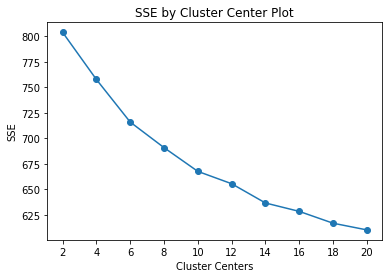

In [0]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(text.toarray()).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

In [0]:
clusters = KMeans(n_clusters=3, random_state=42).fit_predict(text.toarray())

In [0]:
clusters

array([0, 2, 1, 1, 1, 2, 2, 0, 2, 2, 0, 1, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0,
       0, 0, 2, 1, 1, 2, 2, 1, 1, 2, 1, 0, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1,
       0, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 0, 0, 0,
       0, 2, 1, 1, 1, 2, 0, 1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 0, 2, 0, 1, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2,
       1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 1, 1,
       0, 0, 1, 1, 2, 1, 1, 1, 1, 0, 2, 2, 0, 2, 2, 1, 2, 2, 1, 1, 2, 0,
       2, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 0, 2,
       0, 1, 1, 2, 2, 2, 0, 1, 0, 0, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1, 2, 0,
       0, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 2, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 1, 0, 1, 1,
       2, 2, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,

In [0]:
pca = PCA(n_components=3).fit_transform(text.toarray())

In [0]:
pca

array([[ 0.51766043, -0.19269611, -0.38793581],
       [-0.42092687,  0.06351382, -0.07060082],
       [ 0.09859949, -0.05413002,  0.14017456],
       ...,
       [ 0.43809339,  0.24485891, -0.38987486],
       [ 0.43668823,  0.10266544, -0.31128803],
       [ 0.15965412,  0.07765176, -0.02857433]])

In [0]:
len(clusters)

1000

In [0]:
import tensorflow as tf
import tensorboard as tb
tf.io.gfile = tb.compat.tensorflow_stub.io.gfile

In [0]:
!kill 2361

In [0]:
import numpy as np
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()
writer.add_embedding(text.toarray(), clusters)
writer.close()
%load_ext tensorboard
%tensorboard --logdir=runs 